## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing dataset

In [2]:
df= pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Checking for missing values

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Analysing dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Observing values for each feature in the dataset

In [7]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print()

Value counts for column: class
class
e    4208
p    3916
Name: count, dtype: int64

Value counts for column: cap-shape
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Value counts for column: cap-surface
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Value counts for column: cap-color
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Value counts for column: bruises
bruises
f    4748
t    3376
Name: count, dtype: int64

Value counts for column: odor
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Value counts for column: gill-attachment
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Value counts for column: gill-spacing
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Value counts for column: gill-size
gill-size
b    5612

### Encoding all the features to convert all categorical features to numerical features

In [10]:
import joblib
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Encode the column
        label_encoders[col] = le  # Store the encoder

# Save encoders as a dictionary
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) == 0:
    print("No categorical columns found. Dataset may already be encoded.")

### Train- Test Split of the dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.iloc[:,1:]

In [13]:
y=df['class']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Model - Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logistic=LogisticRegression()
logistic.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=logistic.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9499589827727646
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1265
           1       0.94      0.95      0.95      1173

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

[[1200   65]
 [  57 1116]]


## Hyperparameter Tuning And Cross Validation


## Grid SearchCV


In [21]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [23]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [24]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [25]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [26]:
grid.fit(X_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [28]:
y_pred=grid.predict(X_test)


In [29]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9606234618539786
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1253
           1       0.96      0.96      0.96      1185

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

[[1207   46]
 [  50 1135]]


## 2. SVM

In [87]:
from sklearn.svm import SVC

In [88]:
svc=SVC(kernel='linear')

In [89]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [90]:
svc.coef_

array([[ 1.01121807e-05,  7.17277199e-05, -6.81781918e-05,
         4.66095922e-03, -1.43466834e-04, -1.01950440e+00,
        -3.99464988e+00,  4.00103033e+00, -3.48431832e-05,
        -1.99742275e+00, -1.99897944e+00, -1.00079751e+00,
        -9.98244506e-01,  1.38190400e-05,  2.98592495e-05,
         0.00000000e+00,  7.00000000e+00, -1.98817519e+00,
         9.96721778e-01, -1.79976634e-03, -5.50433434e-04,
         7.28227009e-05]])

In [91]:
y_pred=svc.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1257
           1       0.96      0.96      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

[[1207   50]
 [  45 1136]]


## Hyperparameter Tuning With SVC

In [37]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']}

In [38]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.951 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.4s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [95]:
treeclassifier.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.43478260869565216, 0.9375, 'x[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(0.21739130434782608, 0.8125, 'x[20] <= 3.5\ngini = 0.277\nsamples = 2315\nvalue = [384, 1931]'),
 Text(0.32608695652173914, 0.875, 'True  '),
 Text(0.08695652173913043, 0.6875, 'x[19] <= 1.5\ngini = 0.218\nsamples = 417\nvalue = [365, 52]'),
 Text(0.043478260869565216, 0.5625, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.13043478260869565, 0.5625, 'x[21] <= 0.5\ngini = 0.094\nsamples = 384\nvalue = [365, 19]'),
 Text(0.08695652173913043, 0.4375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.17391304347826086, 0.4375, 'gini = 0.0\nsamples = 365\nvalue = [365, 0]'),
 Text(0.34782608695652173, 0.6875, 'x[10] <= 2.0\ngini = 0.02\nsamples = 1898\nvalue = [19, 1879]'),
 Text(0.30434782608695654, 0.5625, 'x[12] <= 0.5\ngini = 0.008\nsamples = 1887\nvalue = [8, 1879]'),
 Text(0.2608695652173913, 0.4375, 'x[7] <= 0.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(

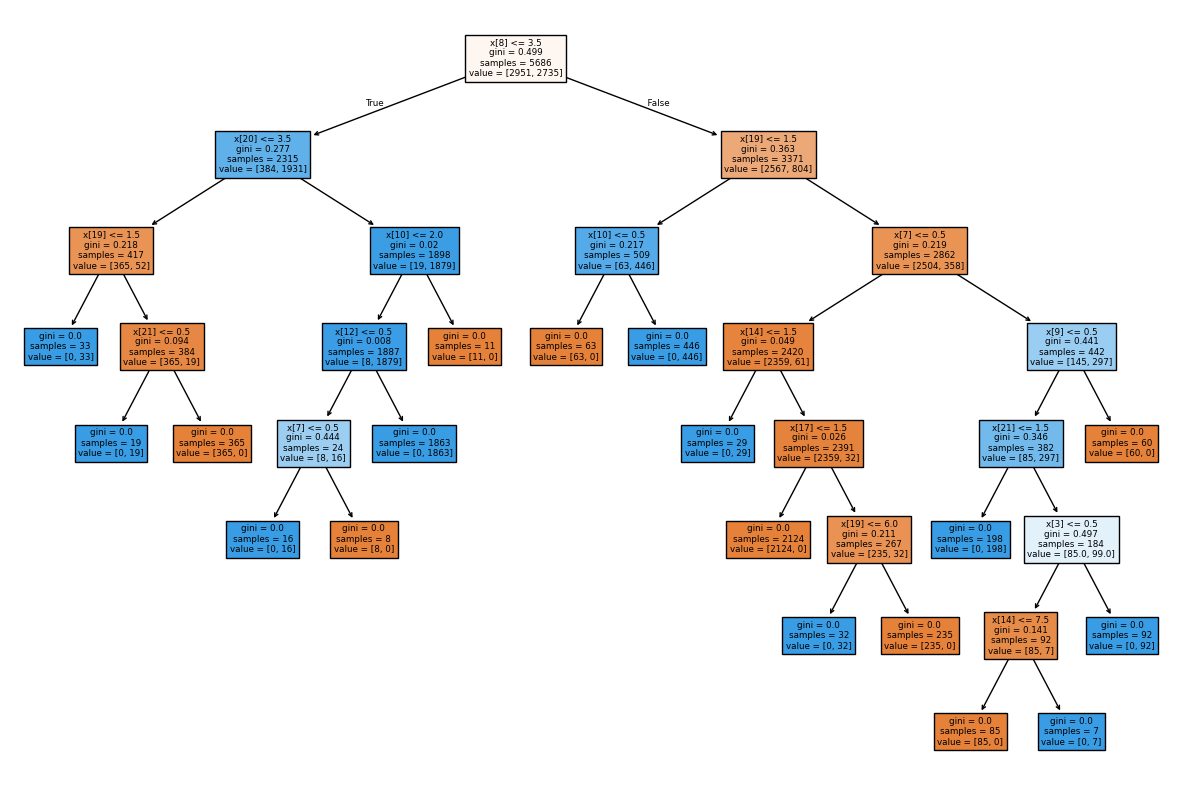

In [96]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [97]:
y_pred=treeclassifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
random_forest = RandomForestClassifier()

In [102]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
y_pred=random_forest.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [20]:
joblib.dump(logistic, "mushroom_model.pkl")
print("Model and encoders saved!")


Model and encoders saved!


In [21]:
print(type(label_encoders))

<class 'dict'>


In [22]:
print("Keys in label_encoders:", label_encoders.keys())


Keys in label_encoders: dict_keys(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])
